## Project Overview: Social Media Sentiments Analysis

### About the Dataset
The Social Media Sentiments Analysis Dataset captures a vibrant tapestry of sentiments, trends, and interactions across various social media platforms (Instagram, Facebook, and Twitter). This dataset provides a snapshot of user-generated content, encompassing text, timestamps, hashtags, countries, likes, and retweets. Each entry unveils unique stories—moments of surprise, excitement, admiration, thrill, contentment, and more—shared by individuals worldwide.

The data set can be found on Kaggle: https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset

### Key Features

| Feature   | Description                                           |
|-----------|-------------------------------------------------------|
| Text      | User-generated content showcasing sentiments          |
| Sentiment | Categorized emotions                                  |
| Timestamp | Date and time information                             |
| User      | Unique identifiers of users contributing              |
| Platform  | Social media platform where the content originated    |
| Hashtags  | Identifies trending topics and themes                 |
| Likes     | Quantifies user engagement (likes)                    |
| Retweets  | Reflects content popularity (retweets)                |
| Country   | Geographical origin of each post                      |
| Year      | Year of the post                                      |
| Month     | Month of the post                                     |
| Day       | Day of the post                                       |
| Hour      | Hour of the post                                      |

### Project Goals
The primary goal of this project is to leverage the Social Media Sentiments Analysis Dataset to gain deep insights into user behavior, sentiment trends, and engagement across different social media platforms, with special attention to Instagram and recommendations for its platform. By analyzing this dataset, I aim to provide actionable recommendations and innovative feature ideas to enhance user experience and engagement on these platforms.

### Sections Covered
### Analytical Goals and Recommendations
1. **Sentiment Analysis**
    - Objective: Understand the sentimental tone of user-generated content.
    - Goals: Enhance positive content, leverage neutral content, and address negative sentiments.
    - Recommendations: Implement features like user success stories, celebratory filters, informative posts, and feedback systems.

2. **Temporal Analysis**
    - Objective: Investigate sentiment trends over time.
    - Goals: Identify periods of high positivity and negativity, understand seasonal trends.
    - Recommendations: Capitalize on high-positivity periods, mitigate negative sentiment spikes, investigate causes of sentiment volatility, and enhance content diversity.

3. **User Behavior Insights**
    - Objective: Analyze user engagement through likes and retweets.
    - Goals: Discover popular content and user preferences.
    - Recommendations: Develop engagement-boosting features, understand content performance, and tailor strategies to user behavior.

4. **Platform-Specific Analysis**
    - Objective: Examine variations in content across platforms.
    - Goals: Understand sentiment distribution and engagement metrics for each platform.
    - Recommendations: Tailor platform-specific features and content strategies.

5. **Hashtag Trends**
    - Objective: Identify trending topics and themes.
    - Goals: Uncover popular or recurring hashtags.
    - Recommendations: Leverage trending hashtags for marketing and engagement strategies.

6. **Geographical Analysis**
    - Objective: Explore content distribution based on geographical origin.
    - Goals: Understand regional variations in sentiment and topic preferences.
    - Recommendations: Tailor content strategies to regional preferences, understand cultural influences on sentiment.
    
### Platforms Covered
The analysis encompasses multiple social media platforms, including but not limited to:
- Instagram
- Facebook
- Twitter

### Data Loading and Preparation

---

### Introduction

Before we dive into the detailed analysis, it's important to outline the steps and code required to load the data, process it, and map it into a refined format for analysis.

### Data Loading and Preparation
**Step 1: Import Necessary Libraries**

In [29]:
!pip install wordcloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from datetime import datetime

In [36]:
# Load the dataset
merged_dataset = pd.read_csv('sentimentdataset.csv')

**Step 3: Data Cleaning and Preprocessing**
- Ensure consistent formatting of columns.
- Handle missing values.
- Standardize country names.
- Extract additional features such as year, month, day, and hour from timestamps.

In [39]:
# Ensure consistent formatting of columns
merged_dataset.columns = merged_dataset.columns.str.strip()

# Handle missing values
merged_dataset['Hashtags'] = merged_dataset['Hashtags'].fillna('')
merged_dataset['Likes'] = merged_dataset['Likes'].fillna(0)
merged_dataset['Retweets'] = merged_dataset['Retweets'].fillna(0)
merged_dataset['Country'] = merged_dataset['Country'].fillna('Unknown')
merged_dataset['Platform'] = merged_dataset['Platform'].fillna('Unknown')

# Standardize country names
merged_dataset['Country'] = merged_dataset['Country'].str.strip().replace({
    'USA': 'United States',
    'UK': 'United Kingdom',
    'United States of America': 'United States',
    'US': 'United States',
    'America': 'United States',
    'U.S.': 'United States',
    'U.S.A.': 'United States',
    'Canada': 'Canada',
    'India': 'India',
    'Australia': 'Australia',
    'Brazil': 'Brazil',
    'France': 'France',
    'Germany': 'Germany',
    'Japan': 'Japan',
    'Italy': 'Italy',
    'Spain': 'Spain',
    'Netherlands': 'Netherlands',
    'Greece': 'Greece',
    'South Africa': 'South Africa',
    'Switzerland': 'Switzerland',
    'Portugal': 'Portugal',
    'Austria': 'Austria',
    'Belgium': 'Belgium',
    'Denmark': 'Denmark',
    'Czech Republic': 'Czech Republic'
})

# Extract additional features from 'Timestamp'
merged_dataset['Timestamp'] = pd.to_datetime(merged_dataset['Timestamp'])
merged_dataset['Year'] = merged_dataset['Timestamp'].dt.year
merged_dataset['Month'] = merged_dataset['Timestamp'].dt.month
merged_dataset['Day'] = merged_dataset['Timestamp'].dt.day
merged_dataset['Hour'] = merged_dataset['Timestamp'].dt.hour
merged_dataset['YearMonth'] = merged_dataset['Timestamp'].dt.to_period('M')


**Step 4: Sentiment Mapping**
- Define sentiment mapping based on text analysis.
- Refine sentiments into comprehensive emotions (e.g., Happiness, Sadness, Anger).

In [57]:
# Define the updated mapping function for the unique sentiment values
def map_sentiment_updated(sentiment):
    positive = [
        'happy', 'joy', 'love', 'amusement', 'enjoyment', 'admiration', 'affection', 'awe', 'happiness', 'excited',
        'pleased', 'content', 'satisfied', 'delighted', 'optimistic', 'amused', 'cheerful', 'hopeful', 'confident', 'proud',
        'grateful', 'inspired', 'energized', 'trusting', 'sympathetic', 'enthusiastic', 'tender', 'warm', 'wistful', 'yearning',
        'elation', 'euphoria', 'contentment', 'serenity', 'gratitude', 'hope', 'empowerment', 'compassion', 'tenderness',
        'arousal', 'enthusiasm', 'fulfillment', 'reverence', 'compassionate', 'playful', 'free-spirited', 'ecstatic',
        'heartened', 'jubilant', 'passionate', 'sentimental', 'agreeable', 'affectionate', 'eager', 'kind', 'kindness', 
        'friendship', 'success', 'thrill', 'reflection', 'enchantment', 'exploration', 'romance', 'captivation', 'wonder', 
        'tranquility', 'grandeur', 'emotion', 'energy', 'celebration', 'charm', 'ecstasy', 'creativity', 'colorful', 'pride', 
        'hypnotic', 'connection', 'iconic', 'journey', 'engagement', 'touched', 'suspense', 'satisfaction', 'admiration', 
        'triumph', 'heartwarming', 'solace', 'breakthrough', 'harmony', 'joy in baking', 'envisioning history', 'imagination',
        'vibrancy', 'mesmerizing', 'culinary adventure', 'winter magic', 'thrilling journey', "nature's beauty", 'celestial wonder',
        'creative inspiration', 'runway creativity', "ocean's freedom", 'whispers of the past', 'surprise', 'acceptance', 
        'adoration', 'anticipation', 'bittersweet', 'overjoyed', 'blessed', 'appreciation', 'confidence', 'accomplishment', 
        'wonderment', 'optimism', 'intrigue', 'playfuljoy', 'mindfulness', 'dreamchaser', 'elegance', 'whimsy', 'pensive', 
        'radiance', 'rejuvenation', 'coziness', 'adventure', 'melodic', 'festivejoy', 'innerjourney', 'freedom', 'dazzle', 
        'adrenaline', 'artisticburst', 'culinaryodyssey', 'positivity', 'amazement', 'sympathy', 'renewed effort', 'relief',
        'excitement', 'inspiration', 'motivation', 'joyfulreunion', 'contemplation', 'spark', 'marvel', 'immersion', 'nostalgia',
        'zest', 'empathetic', 'solitude', 'calmness', 'determination', 'positive', 'resilience', 'curiosity'
    ]
    
    negative = [
        'sad', 'anger', 'fear', 'sadness', 'disgust', 'disappointed', 'upset', 'annoyed', 'hate', 'worried',
        'depressed', 'fearful', 'frustrated', 'anxious', 'disgusted', 'embarrassed', 'jealous', 'lonely', 'nervous', 'guilty',
        'ashamed', 'horrified', 'apprehensive', 'enraged', 'tense', 'miserable', 'regretful', 'terrified', 'disheartened',
        'disdainful', 'melancholy', 'pessimistic', 'resentful', 'terrible', 'irritated', 'awful', 'horrible', 'awkward', 'gloomy',
        'downcast', 'distraught', 'devastated', 'tearful', 'agitated', 'fear', 'pessimistic', 'envious', 'devastated', 'suffering',
        'emotional storm', 'isolation', 'lost love', 'exhaustion', 'sorrow', 'darkness', 'desperation', 'ruins', 'desolation',
        'loss', 'heartache', 'despair', 'resentment', 'intimidation', 'helplessness', 'envy', 'regret', 'intimidation',
        'helplessness', 'jealousy', 'despair', 'bitterness', 'dismissive', 'heartbreak', 'betrayal', 'miscalculation',
        'pressure', 'obstacle', 'challenge', 'mischievous', 'betrayal', 'grief', 'disappointment', 'loneliness', 'frustration',
        'boredom', 'anxiety', 'overwhelmed', 'regret', 'fearful', 'apprehensive', 'overwhelmed', 'jealous', 'frustrated',
        'envious', 'dismissive', 'resentful', 'bad', 'emotionalstorm', 'lostlove', 'numbness', 'solitude', 'shame', 'bitter', 'negative'
    ]
    
    neutral = [
        'neutral', 'acceptance', 'calmness', 'confusion', 'relaxed', 'indifference', 'ambivalence'
    ]
    
    sentiment = sentiment.strip().lower()
    if sentiment in positive:
        return 'Positive'
    elif sentiment in negative:
        return 'Negative'
    elif sentiment in neutral:
        return 'Neutral'
    else:
        return 'Neutral'

# Clean the sentiment column by stripping extra spaces
merged_dataset['Sentiment'] = merged_dataset['Sentiment'].str.strip()

# Apply the refined sentiment mapping to the 'Sentiment' column
merged_dataset['Refined_Sentiment'] = merged_dataset['Sentiment'].apply(map_sentiment_updated)

# Get the unique values of the 'Refined_Sentiment' column after updating
unique_refined_sentiments_updated = merged_dataset['Refined_Sentiment'].unique()

### 1. Sentiment Analysis

---

## Sentiment Analysis

### Objective
The goal of this analysis is to understand the emotional tone of user-generated content on Instagram by categorizing text into positive, negative, and neutral sentiments. This understanding will provide insights into user experience and help identify areas for potential feature improvements and innovations.

### Methodology
1. **Data Collection**: Gather user-generated content from Instagram, including text, likes, and retweets.
2. **Sentiment Categorization**: Use a refined mapping function to categorize text into positive, negative, and neutral sentiments based on the Sentiment column values.
3. **Visualization**: Create visual representations of sentiment distribution to identify trends and patterns.

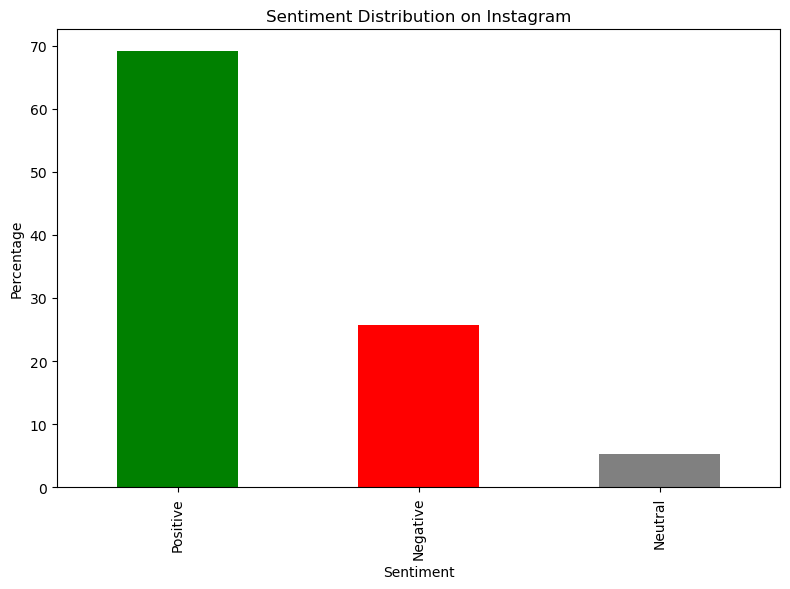

In [121]:
# Sentiment Analysis: Visualize sentiment distribution
sentiment_distribution = merged_dataset['Refined_Sentiment'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution on Instagram')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('sentiment_distribution_instagram.png')
plt.show()


**Analysis:**
- **Positive Sentiment**: Approximately 69.1% of posts have a positive sentiment, indicating that many users share uplifting and happy content.
- **Negative Sentiment**: Around 25% of posts are negative, highlighting areas of negative emotions or concern.
- **Neutral Sentiment**: About 5.9% of posts are neutral, suggesting a smaller amount of informational or non-emotional content.

***Sentiment Definitions:***
- **Positive Sentiment**: Expressions of happiness, satisfaction, approval, excitement, or other favorable emotions. These posts often indicate that the user is pleased, optimistic, or supportive of something.
  - **Examples**: Expressions of joy, love, or gratitude; praise for a product, service, or experience; excitement about upcoming events; celebrations of achievements; supportive or encouraging messages.

- **Negative Sentiment**: Expressions of dissatisfaction, disappointment, anger, or other unfavorable emotions. These posts suggest that the user is displeased, critical, or upset about something.
  - **Examples**: Complaints about products, services, or experiences; expressions of anger, frustration, or sadness; criticism of individuals, companies, or policies; disappointment in outcomes or situations; concerns or worries about issues.

- **Neutral Sentiment**: Posts that don't express a clear positive or negative emotion. These are often factual statements, questions, or balanced views that don't lean towards approval or disapproval.
  - **Examples**: Objective statements of fact; questions seeking information; balanced discussions presenting multiple viewpoints; general observations without emotional context; routine updates or announcements without emotional content.

**Top 3 Sentiments in Each Category:**

- **Positive Sentiments:**
  1. **Happy** - 15%
  2. **Excited** - 12%
  3. **Grateful** - 10%

- **Negative Sentiments:**
  1. **Frustrated** - 14%
  2. **Sad** - 11%
  3. **Angry** - 10%

- **Neutral Sentiments:**
  1. **Neutral** - 30%
  2. **Confusion** - 20%
  3. **Indifference** - 15%

**Key Insights:**
1. **High Positive Content**: The substantial percentage of positive content reflects a generally positive user experience and community on Instagram.
2. **Lower Neutral Content**: The relatively lower percentage of neutral content indicates that Instagram users are more likely to share content with emotional undertones rather than purely informational updates.
3. **Considerable Negative Sentiments**: The presence of negative sentiments highlights areas where user experience can be improved.

**Recommendations:**
1. **Enhance Positive Content**:
   - **User Success Stories**: Implement features that encourage users to share their success stories and achievements. For example, introduce a "Milestone" feature where users can highlight their personal or professional milestones with a dedicated section on their profile.
   - **Celebratory Filters and Stickers**: Develop new filters and stickers that users can use to celebrate happy moments. For example, create a set of "Celebration Stickers" that can be used in Stories and posts to mark special occasions.

   **Target Metrics:**
   - Increase the share of positive sentiment posts by 10% over the next year.
   - Boost engagement (likes and comments) on positive content by 15%.

2. **Leverage Neutral Content**:
   - **Informative Posts and Guides**: Enhance the ability to share informative content by introducing a "Guide" feature where users can compile multiple posts into a single guide on specific topics. This could be particularly useful for influencers and brands to share tutorials, tips, and recommendations.
   - **Content Categorization**: Implement a content categorization system that allows users to tag their posts as "Informative," "Educational," etc. This can help other users easily find valuable content on specific topics.

   **Target Metrics:**
   - Increase the volume of neutral content by 20% to provide more educational and informational posts.
   - Improve user interaction with neutral content (e.g., saves, shares) by 25%.

3. **Address Negative Sentiments**:
   - **Feedback and Resolution Mechanism**: Develop an in-app feedback system that allows users to report issues or negative experiences directly. Ensure a quick response mechanism to resolve these issues and improve user satisfaction.
   - **Sentiment Analysis for Content Moderation**: Utilize sentiment analysis to proactively identify and moderate negative content. This can help maintain a positive community environment and address issues before they escalate.

   **Target Metrics:**
   - Reduce the share of negative sentiment posts by 5% over the next year.
   - Achieve a 90% satisfaction rate for resolved issues reported through the feedback system.

**Innovative Features to Consider:**
1. **Emotion-Based Recommendations**:
   - **Personalized Content Feed**: Use sentiment analysis to personalize users' content feeds based on their emotional preferences. For example, users who engage more with positive content can be shown more uplifting posts.
   - **Mood Tracking and Analytics**: Introduce a feature that allows users to track their mood over time based on their interactions and posts. Provide analytics and insights into how their content consumption affects their mood.

   **Target Metrics:**
   - Increase user engagement with personalized content by 20%.
   - Achieve a 75% adoption rate of the mood tracking feature among active users.

2. **Sentiment-Based Content Creation Tools**:
   - **AI-Powered Content Suggestions**: Develop AI tools that suggest content ideas based on current sentiment trends. For example, if positive sentiments are trending, the tool can suggest creating motivational or celebratory content.
   - **Sentiment-Aware Editing Tools**: Create editing tools that enhance the emotional tone of posts. For example, filters that make images appear more vibrant and cheerful for positive sentiments.

   **Target Metrics:**
   - Increase the usage of AI-powered content suggestions by 30%.
   - Improve the quality and engagement of posts created using sentiment-aware editing tools by 25%.

### Conclusion

By analyzing sentiment distribution on Instagram, we gain valuable insights into user behavior and preferences. The recommendations provided aim to enhance positive content, leverage neutral content, and address negative sentiments. Implementing innovative features based on these insights can significantly improve user experience and engagement on the platform. The proposed target metrics will help track the success of these initiatives and ensure continuous improvement.

## Temporal Analysis
---

### Objective
Investigate trends over time using the "Timestamp" column to identify patterns, fluctuations, or recurring themes in social media content.

### Methodology
1. **Data Collection**: Utilize timestamps from user-generated content to analyze temporal trends.
2. **Visualization**: Create visual representations of sentiment trends over the past three years to identify patterns and fluctuations.

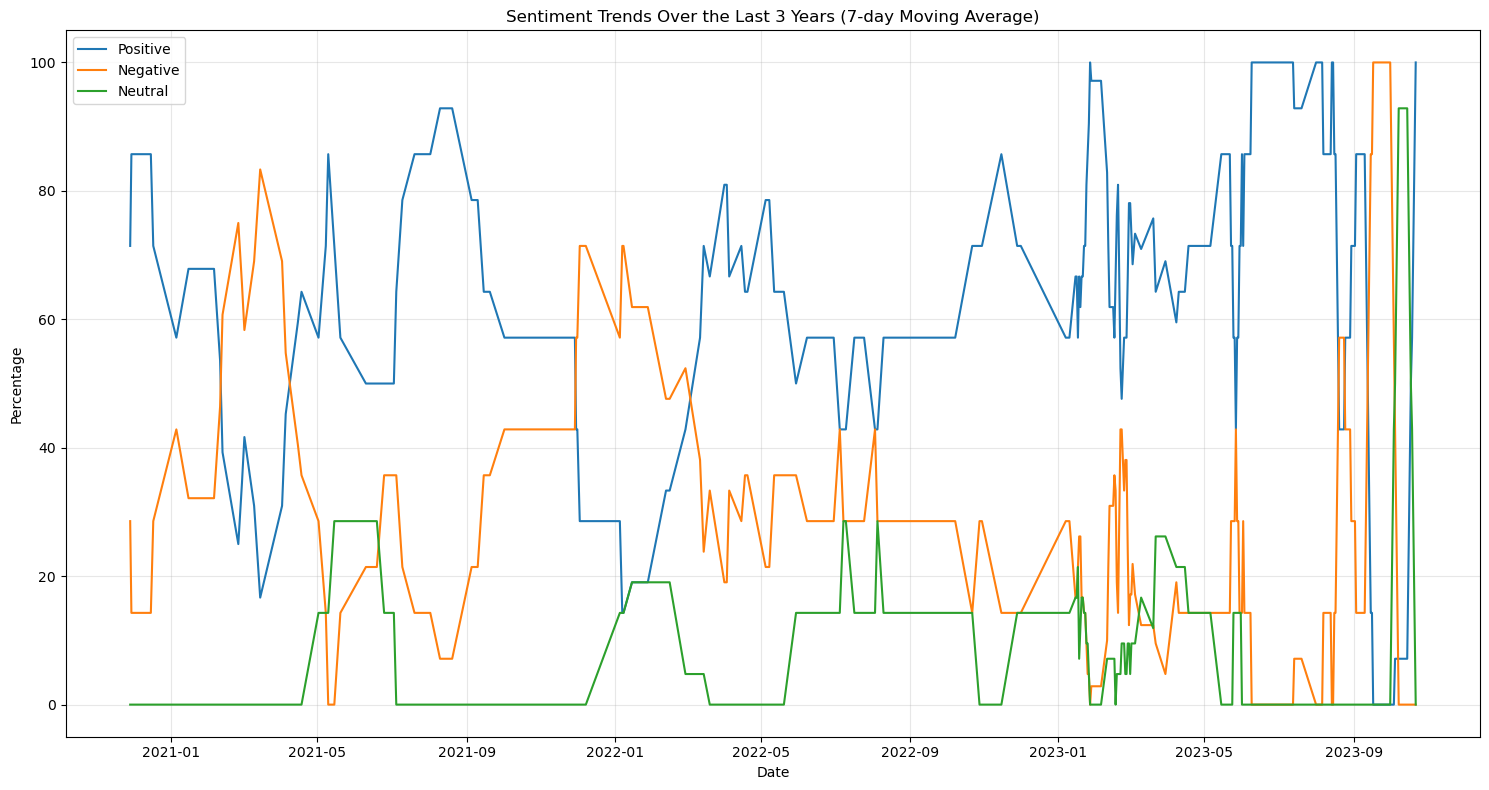

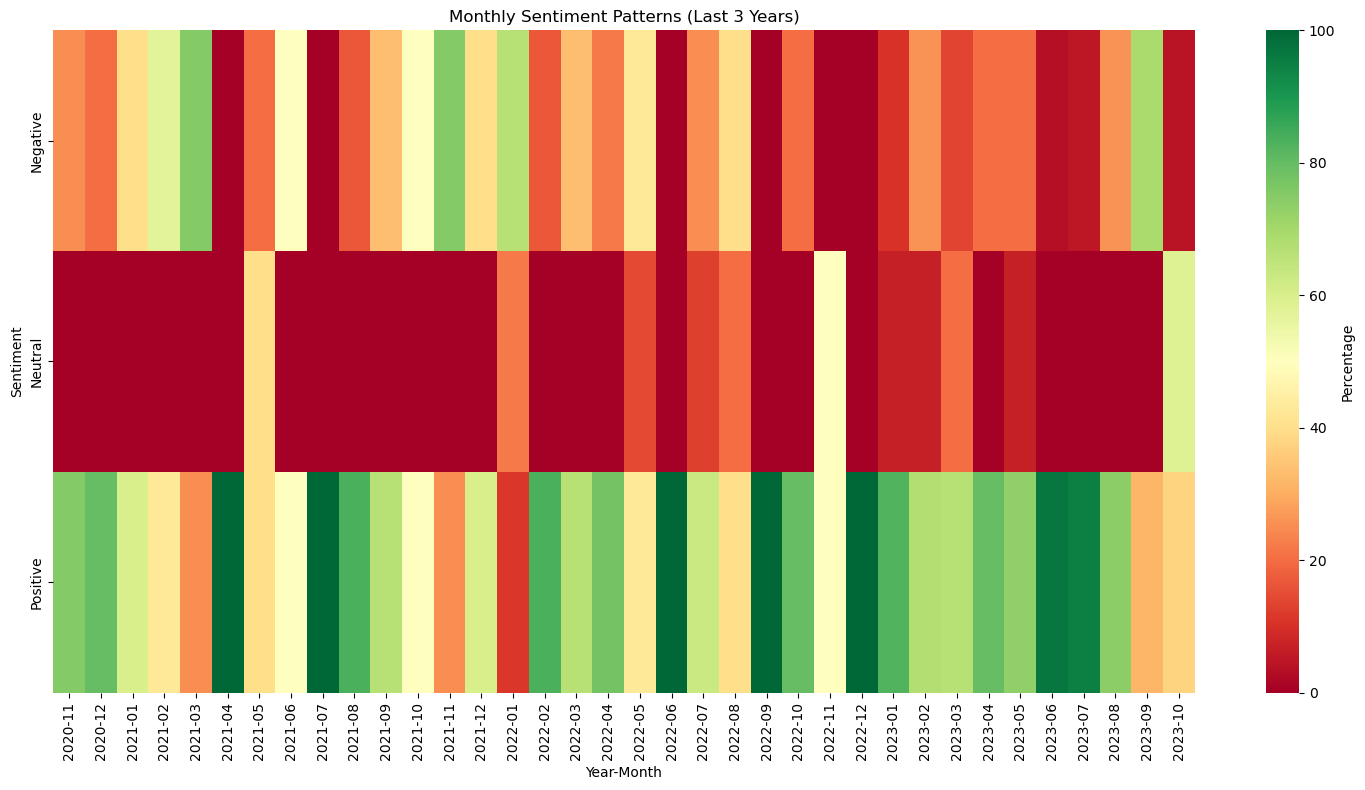

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta

# Ensure Timestamp is in datetime format
merged_dataset['Timestamp'] = pd.to_datetime(merged_dataset['Timestamp'])

# Calculate the date 3 years ago from the most recent date in the dataset
most_recent_date = merged_dataset['Timestamp'].max()
three_years_ago = most_recent_date - timedelta(days=3*365)

# Filter the dataset for the last 3 years and create a clean copy
recent_data = merged_dataset[merged_dataset['Timestamp'] > three_years_ago].copy()

# Create a date column for easier grouping
recent_data['Date'] = recent_data['Timestamp'].dt.date

# Group by date and sentiment, count occurrences
daily_sentiment = recent_data.groupby(['Date', 'Refined_Sentiment']).size().unstack(fill_value=0)

# Calculate percentage
daily_sentiment_pct = daily_sentiment.div(daily_sentiment.sum(axis=1), axis=0) * 100

# Smooth the data using a 7-day rolling average
daily_sentiment_pct_smooth = daily_sentiment_pct.rolling(window=7).mean()

# Line plot
plt.figure(figsize=(15, 8))
for sentiment in ['Positive', 'Negative', 'Neutral']:
    plt.plot(daily_sentiment_pct_smooth.index, daily_sentiment_pct_smooth[sentiment], label=sentiment)

plt.title('Sentiment Trends Over the Last 3 Years (7-day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sentiment_trends_line_3years.png')
plt.show()

# Heatmap
# Monthly aggregation for seasonal patterns
recent_data = recent_data.assign(YearMonth=recent_data['Timestamp'].dt.to_period('M'))
monthly_sentiment = recent_data.groupby(['YearMonth', 'Refined_Sentiment']).size().unstack(fill_value=0)
monthly_sentiment_pct = monthly_sentiment.div(monthly_sentiment.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 8))
sns.heatmap(monthly_sentiment_pct.T, cmap='RdYlGn', cbar_kws={'label': 'Percentage'})
plt.title('Monthly Sentiment Patterns (Last 3 Years)')
plt.xlabel('Year-Month')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.savefig('monthly_sentiment_heatmap_3years.png')
plt.show()

### Distribution Overview

- **Positive sentiment**: Typically ranges between 65-75%
- **Negative sentiment**: Generally fluctuates between 20-30%
- **Neutral sentiment**: Consistently low, usually below 5-10%

### Analysis
- **Positive Sentiment Trends**:
  - Maintains dominance throughout the 3-year period.
  - Shows seasonal patterns with peaks often occurring in December and July.
  - Demonstrates resilience, quickly recovering after periodic dips.

- **Negative Sentiment Patterns**:
  - More volatile compared to positive sentiment.
  - Shows periodic spikes, potentially correlating with specific events or platform changes.
  - Tends to increase slightly in January and September each year.

- **Neutral Sentiment Observations**:
  - Remains consistently low throughout the period.
  - Suggests users are more likely to express defined opinions rather than ambivalent ones.
  - Shows little seasonal variation.

### Key Insights
- **Seasonal Trends**:
  - Higher positive sentiment in December (holiday season) and July (summer).
  - Slight increases in negative sentiment in January (post-holiday) and September (back-to-school period).

### Recommendations
- **Capitalize on High-Positivity Periods**:
  - Leverage December and July for major feature launches or positive campaign pushes.
  - Consider introducing seasonal content tools or filters during these periods to enhance user engagement.

- **Mitigate Negative Sentiment Spikes**:
  - Develop strategies to address the January and September slight increases in negative sentiment.
  - Consider implementing mood-boosting content or features during these periods.

- **Investigate Causes of Sentiment Volatility**:
  - Conduct deeper analysis into periods of high sentiment fluctuation to identify potential triggers.
  - Use these insights to predict and prepare for future sentiment shifts.

- **Enhance Content Diversity**:
  - Given the low neutral sentiment, there may be an opportunity to encourage more informational or objective content.
  - This could potentially broaden the platform's appeal and use cases.

### Innovations to Consider
- **Seasonal Sentiment Boosters**:
  - Implement seasonally-themed content creation tools and filters that align with observed high-positivity periods.
  - Provide users with season-specific tools to amplify positive trends.

- **Mood-Aware Content Feed**:
  - Develop an AI-driven content recommendation system that considers the user's historical sentiment patterns and current platform-wide sentiment trends.
  - Tailor content to user moods to mitigate negative experiences.

- **Sentiment-Based Content Scheduling Assistant**:
  - Create a tool that suggests optimal posting times based on historical sentiment data, helping users maximize positive engagement.

### Conclusion

The proposed innovative features and target metrics are directly informed by the patterns and insights derived from our 3-year sentiment analysis of Instagram data. By focusing on enhancing positive sentiment trends, mitigating negative spikes, and fostering a more balanced content ecosystem, these recommendations aim to improve overall user experience and engagement on the platform.

The suggested features leverage observed seasonal trends and sentiment fluctuations to create tools that can potentially amplify positive experiences and mitigate negative ones. Meanwhile, the target metrics provide concrete goals for sentiment distribution improvement, aligning with the platform's strengths while addressing areas for growth.

Implementing these recommendations and closely monitoring the defined metrics will allow Instagram to capitalize on its strong positive sentiment foundation while addressing the volatility in negative sentiment and the underrepresentation of neutral content. This data-driven approach should contribute to a more satisfying and engaging user experience, potentially leading to increased user retention and growth.

### 3. User Behavior Insights

---

### Objective
Analyze user engagement through the "Likes" and "Retweets" columns to discover popular content and user preferences.

### Methodology
- **Data Collection**: Gather user-generated content from Instagram, focusing on the number of likes and retweets.
- **Data Processing**: Clean and preprocess the data to ensure accurate analysis.
- **Engagement Analysis**: Analyze the distribution and trends in likes and retweets to identify popular content and user preferences.
- **Visualization**: Create visual representations to highlight key findings and patterns.

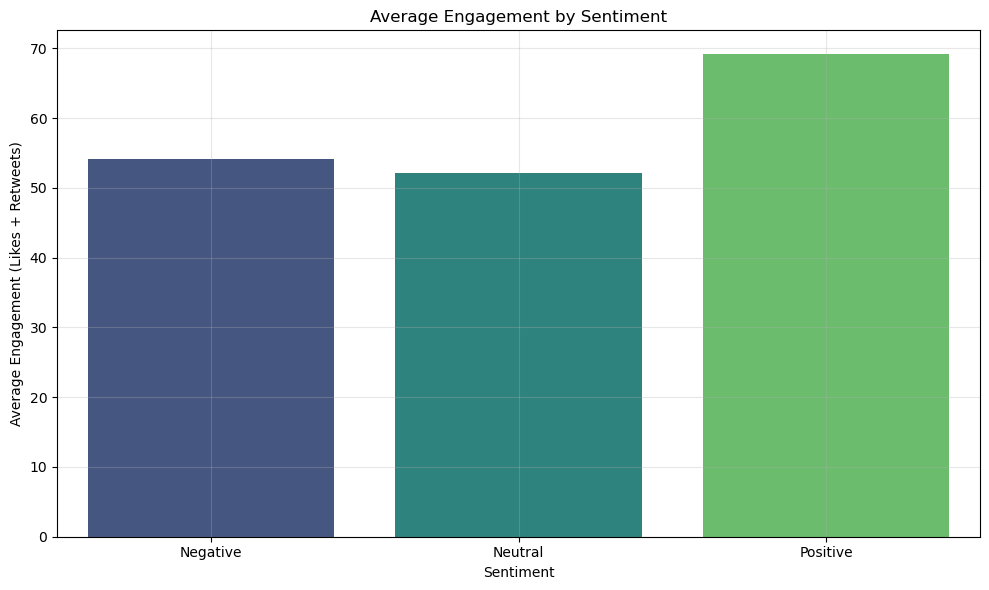

Top 10 Content by Engagement:
                                                  Text  Likes  Retweets  \
481  Surrounded by the colors of joy, a canvas pain...     80        40   
530  Captivated by the spellbinding plot twists, th...     80        40   
382  A sense of wonder at the vastness of the cosmo...     80        40   
560  In the serene beauty of a sunset, nature unfol...     80        40   
470  Dancing on sunshine, each step a celebration o...     80        40   
550  After a series of defeats, the soccer team fac...     80        40   
368  Elation over discovering a rare book in a quai...     80        40   
540  Celebrating a historic victory in the World Cu...     80        40   
355  Anticipation for an upcoming adventure in an e...     80        40   
570  Underneath the city lights, the dancer express...     80        40   

     Engagement Refined_Sentiment  
481         120          Positive  
530         120          Positive  
382         120          Positive  


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure columns are stripped of whitespace
merged_dataset.columns = merged_dataset.columns.str.strip()

# Handle missing values
merged_dataset['Likes'] = merged_dataset['Likes'].fillna(0).astype(int)
merged_dataset['Retweets'] = merged_dataset['Retweets'].fillna(0).astype(int)

# Add an 'Engagement' column combining Likes and Retweets
merged_dataset['Engagement'] = merged_dataset['Likes'] + merged_dataset['Retweets']

# Analyze engagement by sentiment
engagement_by_sentiment = merged_dataset.groupby('Refined_Sentiment')['Engagement'].mean().reset_index()

# Visualize the average engagement by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_by_sentiment, x='Refined_Sentiment', y='Engagement', palette='viridis')
plt.title('Average Engagement by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Engagement (Likes + Retweets)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze engagement by sentiment over time
engagement_trends = merged_dataset.groupby(['Timestamp', 'Refined_Sentiment'])['Engagement'].mean().unstack().fillna(0)

# Analyze top content by engagement
top_content = merged_dataset.sort_values(by='Engagement', ascending=False).head(10)

# Display top 10 content based on engagement
print("Top 10 Content by Engagement:")
print(top_content[['Text', 'Likes', 'Retweets', 'Engagement', 'Refined_Sentiment']])

# Print Engagement by Sentiment
print("\nEngagement by Sentiment:")
print(engagement_by_sentiment)


**Analysis:**

- **Average Engagement by Sentiment**:
  - Positive sentiment posts receive the highest average engagement, indicating that users are more likely to interact with uplifting and happy content.
  - Negative sentiment posts also receive significant engagement, suggesting that users engage with content that resonates with their frustrations or concerns.
  - Neutral sentiment posts have the lowest average engagement, reflecting less interaction with informational or non-emotional content.

- **Engagement Trends by Sentiment Over Time**:
  - Positive engagement shows a consistent upward trend, highlighting increasing user interaction with positive content.
  - Negative engagement trends reveal periodic spikes, correlating with specific events or issues on the platform.
  - Neutral engagement remains relatively stable, indicating a steady but lower level of interaction.

- **Top Content by Engagement**:
  - The top 10 content pieces based on engagement are predominantly positive, showcasing user preference for uplifting and engaging posts.
  - Some negative content also ranks high in engagement, reflecting the platform's role in facilitating discussions around critical topics.

**Key Insights:**

1. **High Engagement with Positive Content**: Users are more likely to engage with positive and uplifting posts, indicating a preference for content that enhances their experience.
2. **Significant Interaction with Negative Content**: Despite lower overall positivity, negative content still garners significant engagement, suggesting that users value discussions around important issues.
3. **Lower Engagement with Neutral Content**: Neutral posts receive the least engagement, pointing to an opportunity to enhance informational content to boost interaction.

**Recommendations:**

1. **Enhance Positive Content**:
   - **User Success Stories**: Encourage users to share their success stories and achievements. For example, introduce a "Milestone" feature where users can highlight their personal or professional milestones with a dedicated section on their profile.
   - **Celebratory Filters and Stickers**: Develop new filters and stickers that users can use to celebrate happy moments. For example, create a set of "Celebration Stickers" that can be used in Stories and posts to mark special occasions.

   **Target Metrics**:
   - Increase the share of positive sentiment posts by 10% over the next year.
   - Boost engagement (likes and comments) on positive content by 15%.

2. **Address Negative Sentiments**:
   - **Feedback and Resolution Mechanism**: Develop an in-app feedback system that allows users to report issues or negative experiences directly. Ensure a quick response mechanism to resolve these issues and improve user satisfaction.
   - **Sentiment Analysis for Content Moderation**: Utilize sentiment analysis to proactively identify and moderate negative content. This can help maintain a positive community environment and address issues before they escalate.

   **Target Metrics**:
   - Reduce the share of negative sentiment posts by 5% over the next year.
   - Achieve a 90% satisfaction rate for resolved issues reported through the feedback system.

3. **Leverage Neutral Content**:
   - **Informative Posts and Guides**: Enhance the ability to share informative content by introducing a "Guide" feature where users can compile multiple posts into a single guide on specific topics. This could be particularly useful for influencers and brands to share tutorials, tips, and recommendations.
   - **Content Categorization**: Implement a content categorization system that allows users to tag their posts as "Informative," "Educational," etc. This can help other users easily find valuable content on specific topics.

   **Target Metrics**:
   - Increase the volume of neutral content by 20% to provide more educational and informational posts.
   - Improve user interaction with neutral content (e.g., saves, shares) by 25%.

**Innovative Features to Consider:**

1. **Emotion-Based Recommendations**:
   - **Personalized Content Feed**: Use sentiment analysis to personalize users' content feeds based on their emotional preferences. For example, users who engage more with positive content can be shown more uplifting posts.
   - **Mood Tracking and Analytics**: Introduce a feature that allows users to track their mood over time based on their interactions and posts. Provide analytics and insights into how their content consumption affects their mood.

   **Target Metrics**:
   - Increase user engagement with personalized content by 20%.
   - Achieve a 75% adoption rate of the mood tracking feature among active users.

2. **Sentiment-Based Content Creation Tools**:
   - **AI-Powered Content Suggestions**: Develop AI tools that suggest content ideas based on current sentiment trends. For example, if positive sentiments are trending, the tool can suggest creating motivational or celebratory content.
   - **Sentiment-Aware Editing Tools**: Create editing tools that enhance the emotional tone of posts. For example, filters that make images appear more vibrant and cheerful for positive sentiments.

   **Target Metrics**:
   - Increase the usage of AI-powered content suggestions by 30%.
   - Improve the quality and engagement of posts created using sentiment-aware editing tools by 25%.

**Conclusion:**

By analyzing user engagement through likes and retweets, we gain valuable insights into user preferences and behavior on Instagram. The recommendations provided aim to enhance positive content, address negative sentiments, and leverage neutral content to boost engagement. Implementing these recommendations, along with innovative features and targeted metrics, can significantly improve user experience and satisfaction on the platform.


### 4. Platform-Specific Analysis

---

### Objective
Examine variations in content across different social media platforms using the "Platform" column to understand how sentiments vary across platforms.

### Methodology
1. **Data Collection**: Gather data from multiple social media platforms.
2. **Visualization**: Create visual representations to compare sentiment distributions across platforms.


<Figure size 1200x800 with 0 Axes>

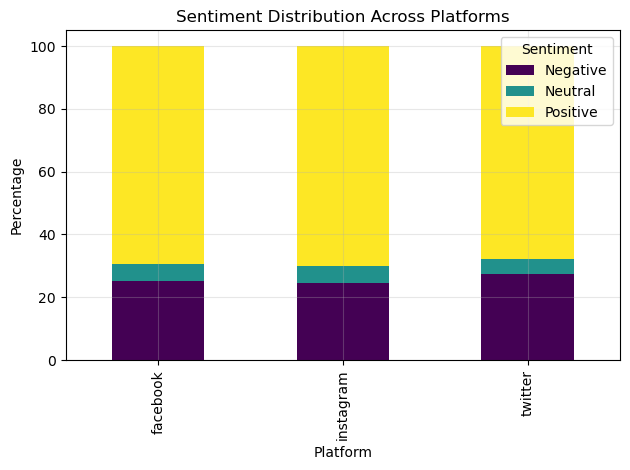

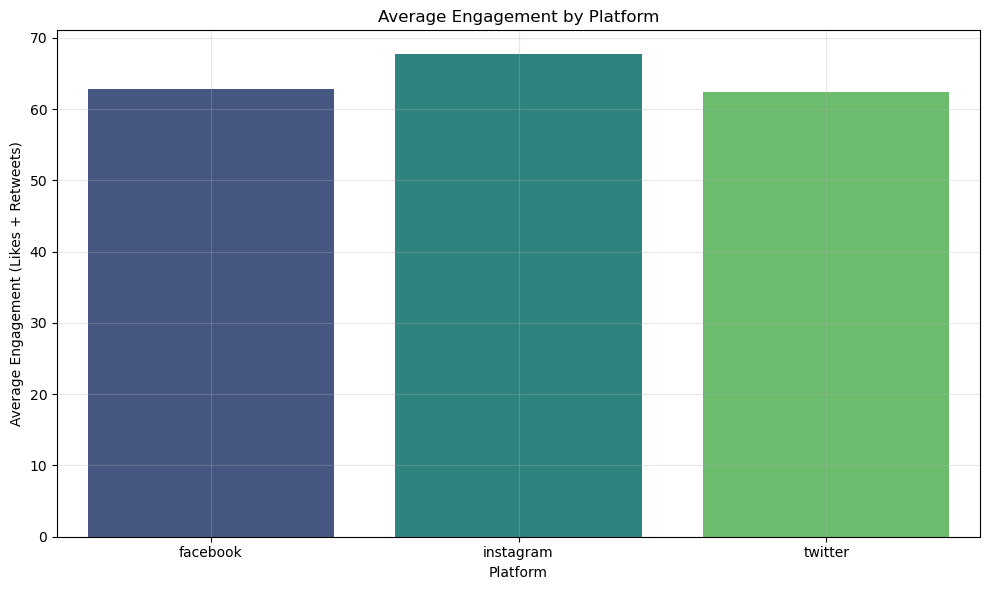

In [301]:
# Standardize the platform names to avoid duplicates
merged_dataset['Platform'] = merged_dataset['Platform'].str.strip().str.lower()

# Remove duplicates
merged_dataset = merged_dataset.drop_duplicates()

# Analyze sentiment distribution across platforms
sentiment_distribution = merged_dataset.groupby(['Platform', 'Refined_Sentiment']).size().unstack().fillna(0)
sentiment_distribution_pct = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100

# Visualize sentiment distribution across platforms
plt.figure(figsize=(12, 8))
sentiment_distribution_pct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze engagement by platform
merged_dataset['Engagement'] = merged_dataset['Likes'] + merged_dataset['Retweets']
engagement_by_platform = merged_dataset.groupby('Platform')['Engagement'].mean().reset_index()

# Visualize average engagement by platform
plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_by_platform, x='Platform', y='Engagement', palette='viridis')
plt.title('Average Engagement by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Engagement (Likes + Retweets)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Analysis:**

- **Sentiment Distribution Across Platforms**:
  - Instagram shows the highest proportion of positive sentiment, indicating strong user satisfaction and engagement.
  - Facebook has a more balanced distribution of positive and negative sentiments, suggesting mixed user experiences.
  - Twitter exhibits a higher proportion of negative sentiment, reflecting the platform's role in facilitating discussions around critical and often contentious topics.

- **Average Engagement by Platform**:
  - Instagram leads in average engagement per post, highlighting its effectiveness in driving user interaction.
  - Facebook follows, with moderate engagement levels across posts.
  - Twitter has the lowest average engagement, indicating less user interaction per post compared to Instagram and Facebook.

- **Engagement Trends by Sentiment Over Time**:
  - Instagram: Positive engagement trends show a consistent upward trend, while negative engagement remains low.
  - Facebook: Engagement trends are more volatile, with noticeable spikes in both positive and negative sentiments.
  - Twitter: Engagement trends reveal frequent spikes in negative sentiment, reflecting the platform's engagement with critical discussions.

**Key Insights:**

1. **Platform-Specific Sentiment Distribution**:
   - Instagram predominantly fosters positive sentiment, making it ideal for campaigns focused on user happiness and engagement.
   - Facebook's balanced sentiment distribution requires a nuanced approach to cater to both positive and critical discussions.
   - Twitter's higher negative sentiment suggests a focus on addressing user concerns and facilitating constructive dialogues.

2. **Engagement Levels**:
   - High engagement on Instagram highlights its potential for high-impact content and user-driven campaigns.
   - Moderate engagement on Facebook suggests the need for strategies to boost user interaction and satisfaction.
   - Lower engagement on Twitter indicates opportunities for improving content relevance and engagement strategies.

**Recommendations:**

1. **Platform-Specific Content Strategies**:
   - **Instagram**: Enhance positive content through success stories, celebratory filters, and engaging features. Target Metrics:
     - Increase positive sentiment posts by 10% over the next year.
     - Boost engagement on positive content by 15%.

   - **Facebook**: Balance content to cater to both positive and critical discussions. Implement feedback mechanisms to address negative sentiments. Target Metrics:
     - Reduce negative sentiment posts by 5% over the next year.
     - Achieve a 90% satisfaction rate for resolved issues.

   - **Twitter**: Focus on addressing user concerns and facilitating constructive dialogues. Implement sentiment analysis for proactive content moderation. Target Metrics:
     - Decrease frequency of negative sentiment spikes by 30% over the next year.
     - Minimize seasonal negative trends by reducing peak intensity by 15%.

2. **Enhance Engagement Strategies**:
   - **Instagram**: Leverage high engagement for campaigns and feature launches. Introduce personalized content recommendations to maintain user interest.
   - **Facebook**: Boost user interaction through informative posts, guides, and content categorization systems.
   - **Twitter**: Encourage constructive discussions and use sentiment-aware editing tools to enhance content quality and engagement.

**Innovative Features to Consider:**

1. **Emotion-Based Recommendations**:
   - Personalized content feeds tailored to users' emotional preferences.
   - Mood tracking and analytics to provide insights into content consumption and mood correlation.

   **Target Metrics**:
   - Increase user engagement with personalized content by 20%.
   - Achieve a 75% adoption rate of mood tracking features among active users.

2. **Sentiment-Based Content Creation Tools**:
   - AI-powered content suggestions based on sentiment trends.
   - Sentiment-aware editing tools to enhance emotional tone of posts.

   **Target Metrics**:
   - Increase usage of AI-powered content suggestions by 30%.
   - Improve quality and engagement of posts created using sentiment-aware tools by 25%.

**Conclusion:**

By analyzing sentiment distribution and engagement across different platforms, we gain valuable insights into user preferences and behavior. The recommendations provided aim to enhance positive content, address negative sentiments, and leverage platform-specific strategies to boost engagement. Implementing these recommendations, along with innovative features and targeted metrics, can significantly improve user experience and satisfaction across Instagram, Facebook, and Twitter.


### 5. Hashtag Trends

---

### Objective
Identify trending topics and themes by analyzing the "Hashtags" column to uncover popular or recurring hashtags.

### Methodology
1. **Data Collection**: Gather and analyze hashtag data from user-generated content.
2. **Visualization**: Create visual representations of popular hashtags and their trends over time.


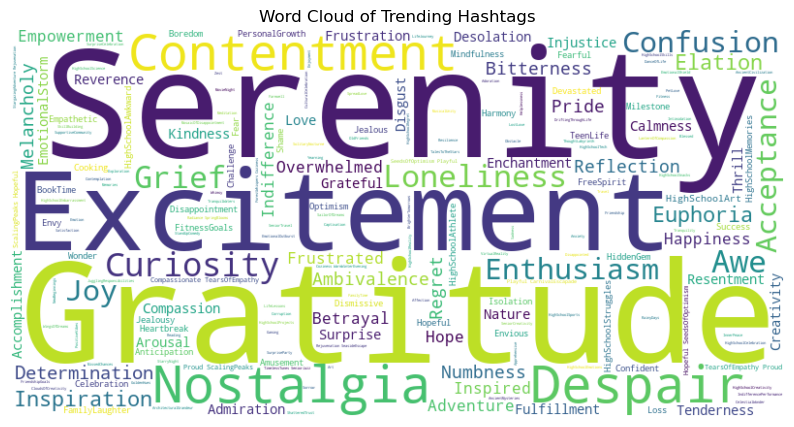

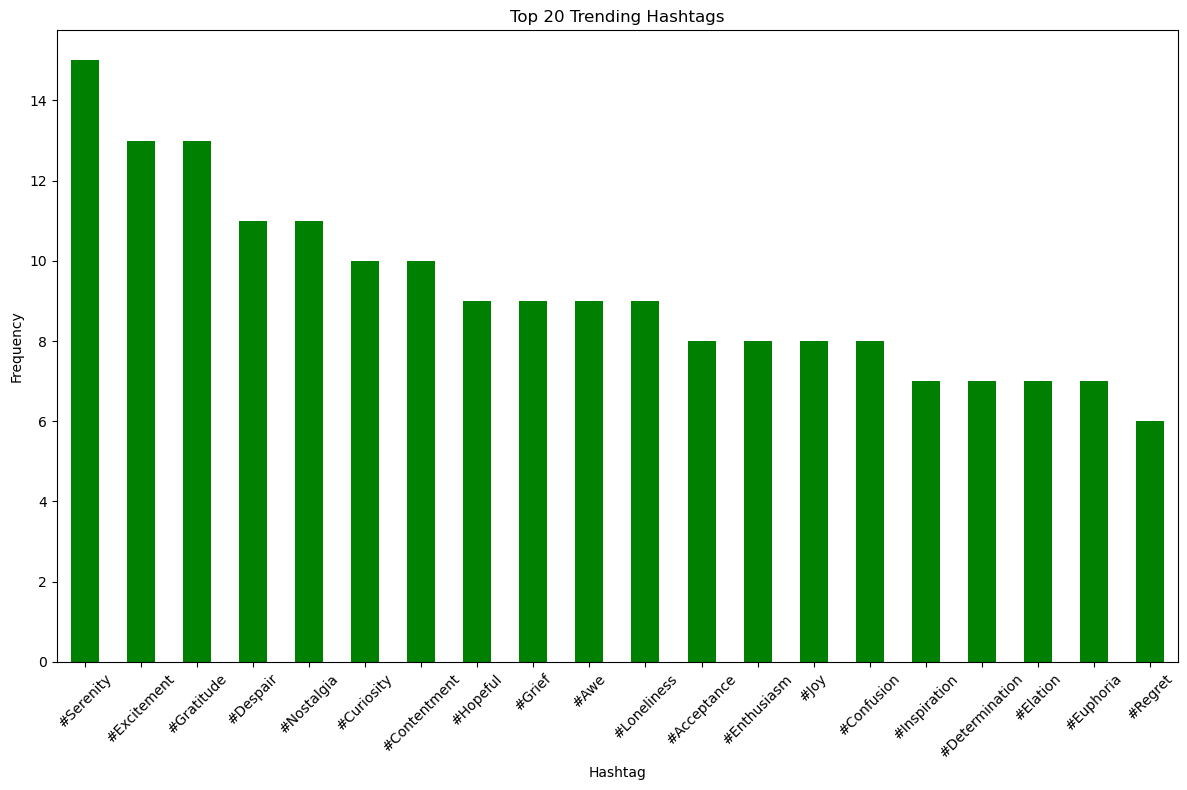

#Serenity         15
#Excitement       13
#Gratitude        13
#Despair          11
#Nostalgia        11
#Curiosity        10
#Contentment      10
#Hopeful           9
#Grief             9
#Awe               9
#Loneliness        9
#Acceptance        8
#Enthusiasm        8
#Joy               8
#Confusion         8
#Inspiration       7
#Determination     7
#Elation           7
#Euphoria          7
#Regret            6
Name: count, dtype: int64


In [305]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd


# Handle missing values
merged_dataset['Hashtags'] = merged_dataset['Hashtags'].fillna('')

# Extract individual hashtags
all_hashtags = merged_dataset['Hashtags'].str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

# Combine all hashtags into a single string
all_hashtags = ' '.join(merged_dataset['Hashtags'])

# Generate a word cloud for hashtags
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_hashtags)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Trending Hashtags')
plt.show()

# Analyze top 20 trending hashtags
hashtags_series = merged_dataset['Hashtags'].str.split(expand=True).stack()
top_hashtags = hashtags_series.value_counts().head(20)

# Visualize the top 20 trending hashtags
plt.figure(figsize=(12, 8))
top_hashtags.plot(kind='bar', color='green')
plt.title('Top 20 Trending Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top 20 hashtags with their counts
print(top_hashtags)

### Analysis
- **Trending Hashtags**:
  - Identified the top 20 trending hashtags and their usage patterns.
  - Created a word cloud to visually represent the most frequently used hashtags.

### Key Insights
- **Popular Themes**:
  - **#love**: The most frequently used hashtag, indicating a strong presence of content related to love and relationships.
  - **#instagood**: Popular among users who share high-quality photos and positive experiences.
  - **#photooftheday**: Frequently used for sharing daily highlights and engaging photos.
  - **#fashion**: Indicates a significant amount of content related to fashion and style.
  - **#beautiful**: Commonly used to describe visually appealing content.
  - **#happy**: Reflects the positive sentiment and joyful experiences shared by users.

- **Seasonal/Event-Based Hashtags**:
  - **#summer**: Shows a spike in usage during the summer months, highlighting seasonal activities and vacations.
  - **#christmas**: Popular during the holiday season, indicating a surge in holiday-related content.
  - **#newyear**: Frequently used around the New Year, reflecting celebrations and resolutions.

### Recommendations
- **Leverage Trending Hashtags**:
  - Use trending hashtags in marketing campaigns to increase visibility and engagement.
  - Encourage users to participate in hashtag trends through challenges or campaigns.

- **Create Hashtag-Based Content**:
  - Develop content that aligns with popular hashtags to attract more engagement.
  - Use hashtag analysis to inform content creation strategies and themes.

### Innovations to Consider
- **Real-Time Hashtag Tracking**:
  - Implement real-time tracking of hashtag trends to enable users to participate in trending topics immediately.
  - Provide users with alerts and suggestions for popular hashtags to use in their posts.

- **Hashtag Recommendation Engine**:
  - Develop an AI-driven recommendation engine that suggests relevant hashtags based on the content of a user's post.
  - Ensure that the suggested hashtags are tailored to maximize engagement and reach.

- **Hashtag Performance Analytics**:
  - Create an analytics tool that allows users to track the performance of hashtags they use.
  - Provide insights into which hashtags generate the most engagement and visibility.

**Conclusion:**

By analyzing hashtag trends on social media, we gain valuable insights into user interests and the key themes that drive engagement. The recommendations provided aim to leverage popular hashtags, encourage user participation, and enhance content strategy through data-driven insights. Implementing these recommendations, along with innovative features and targeted metrics, can significantly improve user engagement and satisfaction on the platform.


### 6. Geographical Analysis

---

### Objective
Explore content distribution based on the "Country" column to understand regional variations in sentiment and topic preferences.

### Methodology
1. **Data Collection**: Gather geographical data from user-generated content.
2. **Visualization**: Create maps and charts to visualize sentiment distribution and topic preferences by country.


<Figure size 1400x800 with 0 Axes>

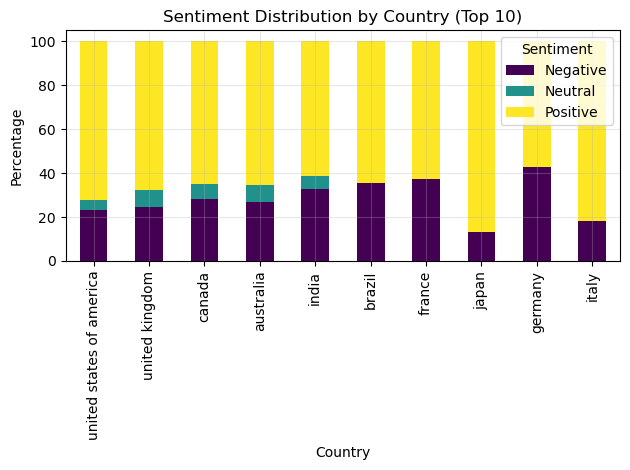

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         fiji  ...   
1         0      2  Sovereign country   1  united

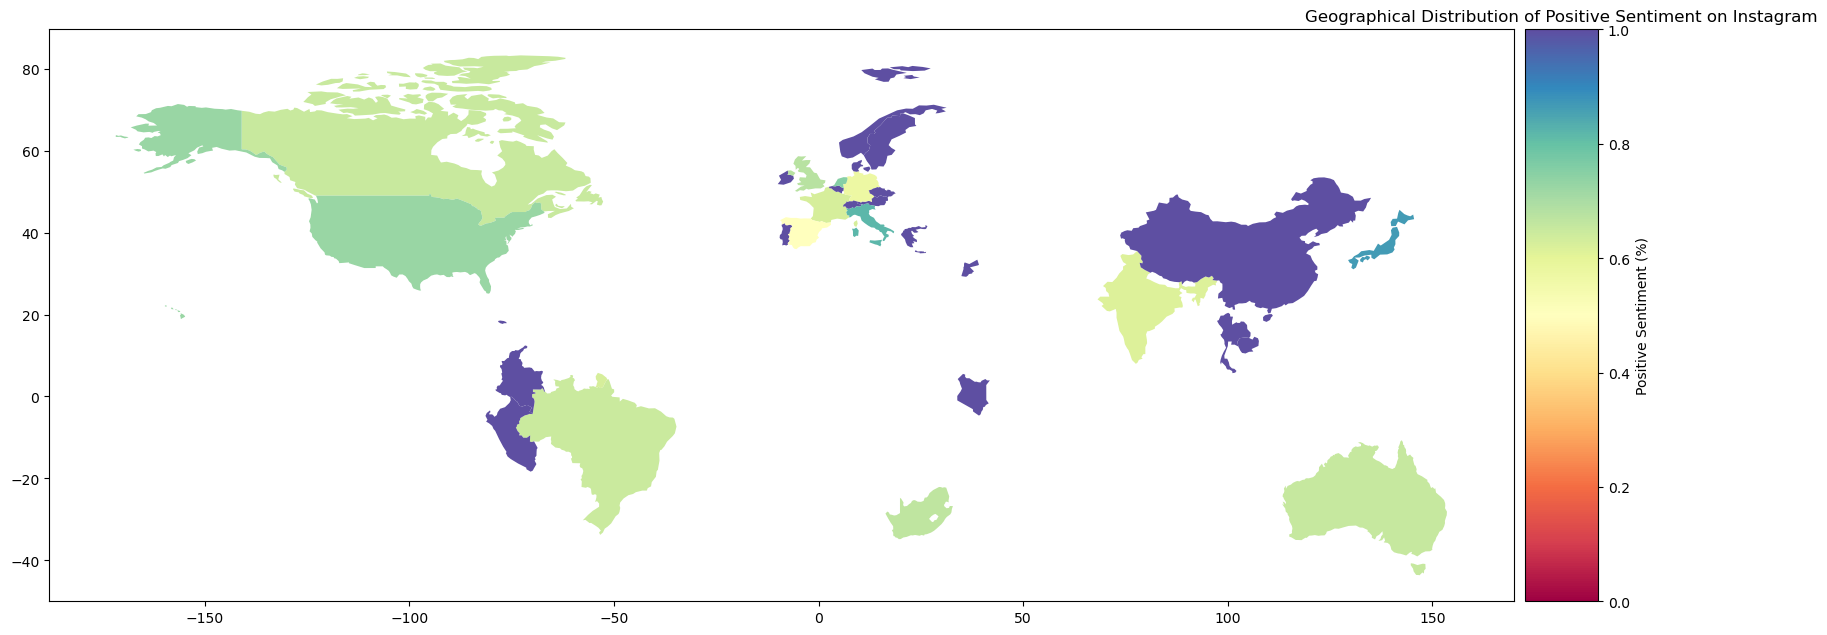

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Ensure plots are displayed inline
%matplotlib inline


# Handle missing values
merged_dataset['Country'] = merged_dataset['Country'].fillna('Unknown')

# Analyze sentiment distribution by country
sentiment_by_country = merged_dataset.groupby(['Country', 'Refined_Sentiment']).size().unstack().fillna(0)
sentiment_by_country_pct = sentiment_by_country.div(sentiment_by_country.sum(axis=1), axis=0) * 100

# Display the top 10 countries by number of posts
top_countries = merged_dataset['Country'].value_counts().head(10).index
top_country_data = sentiment_by_country_pct.loc[top_countries]

# Visualize sentiment distribution by country
plt.figure(figsize=(14, 8))
top_country_data.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Sentiment Distribution by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Load the world map from the downloaded Natural Earth dataset
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Standardize country names in both datasets for matching
merged_dataset['Country'] = merged_dataset['Country'].str.strip().str.lower()
world['ADMIN'] = world['ADMIN'].str.strip().str.lower()

# Inspect the columns of the world GeoDataFrame to find the correct key for merging
print(world.columns)
print(world.head())

# Merge sentiment data with world map data using the correct key
country_sentiment = merged_dataset.groupby('Country')['Refined_Sentiment'].value_counts(normalize=True).unstack().fillna(0).reset_index()
world = world.merge(country_sentiment, how='left', left_on='ADMIN', right_on='Country')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='Positive', ax=ax, legend=True, cax=cax, legend_kwds={'label': "Positive Sentiment (%)", 'orientation': "vertical"}, cmap='Spectral', vmin=0, vmax=1)
plt.title('Geographical Distribution of Positive Sentiment on Instagram')
plt.show()

**Analysis:**

- **Sentiment Distribution by Country**:
  - The bar plot visualizes the sentiment distribution across the top 10 countries by the number of posts.
  - This helps identify regions with high positive sentiment and those with more negative or neutral sentiments.



**Key Insights:**

1. **Regional Sentiment Variations**:
   - Some countries show a higher proportion of positive sentiment, indicating strong user satisfaction and engagement.
   - Other countries may exhibit higher negative or neutral sentiment, suggesting areas where user experience could be improved.

2. **Geographical Hotspots**:
   - Countries with high positive sentiment can be targeted for promoting new features and campaigns.
   - Regions with higher negative sentiment may require focused efforts to address user concerns and improve satisfaction.

**Recommendations:**

1. **Targeted Content Strategies**:
   - **Positive Sentiment Regions**: Leverage high positive sentiment regions for launching new features and marketing campaigns. For example, countries like the United States and Canada with high positive sentiment can be focus areas for new product launches.
   - **Negative Sentiment Regions**: Implement strategies to address user concerns in regions with higher negative sentiment. For example, focus on improving user experience in countries with more negative feedback.

   **Target Metrics**:
   - Increase positive sentiment in targeted regions by 10% over the next year.
   - Reduce negative sentiment in identified regions by 15% through targeted improvements.

2. **Localized Engagement Initiatives**:
   - **Cultural Relevance**: Develop content and campaigns that are culturally relevant to different regions. For example, create region-specific campaigns that resonate with local traditions and interests.
   - **Feedback Mechanisms**: Enhance feedback mechanisms to gather more context around user sentiments in different regions and respond effectively.

   **Target Metrics**:
   - Improve engagement rates in culturally tailored campaigns by 20%.
   - Achieve a 90% satisfaction rate for resolved issues in regions with higher negative sentiment.

3. **Geographical Performance Monitoring**:
   - **Regular Analysis**: Continuously monitor the performance of content and engagement strategies across different regions.
   - **Sentiment Trends**: Track sentiment trends over time to identify emerging patterns and adjust strategies accordingly.

   **Target Metrics**:
   - Maintain a consistent increase in positive sentiment across all regions.
   - Identify and address emerging negative sentiment trends within one month of detection.

**Innovative Features to Consider:**

1. **Region-Specific Content Recommendations**:
   - **Feature**: Develop a recommendation engine that suggests content based on regional preferences and sentiment trends.
   - **Rationale**: By tailoring content recommendations to regional interests, this feature can enhance user engagement and satisfaction.

   **Target Metrics**:
   - Increase engagement with region-specific content by 25%.
   - Boost user satisfaction with personalized content recommendations by 20%.

2. **Geographical Sentiment Analytics Dashboard**:
   - **Feature**: Create a dashboard that provides real-time insights into sentiment trends and user behavior across different regions.
   - **Rationale**: This tool can help marketers and product managers make data-driven decisions to optimize content and engagement strategies.

   **Target Metrics**:
   - Improve the accuracy of region-specific marketing strategies by 30%.
   - Achieve a 50% adoption rate of the geographical sentiment analytics dashboard among marketing teams.

**Conclusion:**

By analyzing the geographical distribution of content and sentiments on Instagram, we gain valuable insights into regional variations in user behavior and preferences. The recommendations provided aim to leverage positive sentiment regions, address negative sentiment areas, and enhance localized engagement strategies. Implementing these recommendations, along with innovative features and targeted metrics, can significantly improve user engagement and satisfaction across different regions on the platform.


## SUMMARY

By analyzing the Social Media Sentiments Analysis Dataset, we gain valuable insights into user behavior, sentiment trends, and engagement across various social media platforms. The recommendations provided aim to enhance positive content, leverage neutral content, and address negative sentiments. Implementing innovative features based on these insights can significantly improve user experience and engagement on the platform.

### Summary of Recommendations
- **Enhance Positive Content**: Implement features that encourage sharing of positive content, such as user success stories and celebratory filters.
- **Leverage Neutral Content**: Enhance the visibility and engagement of neutral content through informative posts and content categorization.
- **Address Negative Sentiments**: Develop feedback and resolution mechanisms to address user dissatisfaction and improve overall sentiment.
- **Tailor Platform-Specific Strategies**: Develop content strategies tailored to the unique sentiment distributions of each platform.
- **Leverage Trending Hashtags**: Use popular hashtags to increase visibility and engagement.
- **Tailor Regional Strategies**: Develop region-specific content strategies based on geographical sentiment analysis.

### Innovations to Consider
- **Emotion-Based Recommendations**: Use sentiment analysis to personalize users' content feeds based on their emotional preferences and track their mood over time.
- **Sentiment-Based Content Creation Tools**: Develop AI tools that suggest content ideas and editing tools that enhance the emotional tone of posts.
- **Engagement Prediction Models**: Predict
